In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [2]:
df_airline=pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [4]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [5]:
df_airline.dropna(axis=0,inplace=True)

In [6]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [7]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [8]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [9]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [10]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [11]:
df_airline.set_index('Month',inplace=True)

In [12]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot: xlabel='Month'>

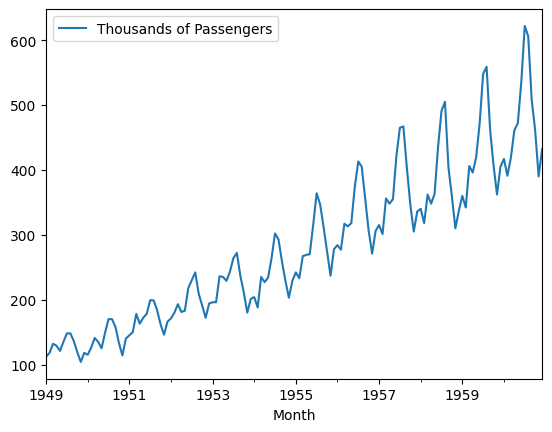

In [13]:
df_airline.plot()

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [16]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060371
p- value: 0.9918802434376408
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [17]:
## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [18]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [19]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.829266824169981
p- value: 0.05421329028382792
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [20]:
## Use Techniques Differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [21]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468505
p- value: 2.7328918500142407e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [22]:
### 12 months 
## Use Techniques Differencing
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [23]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.383020726492481
p- value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

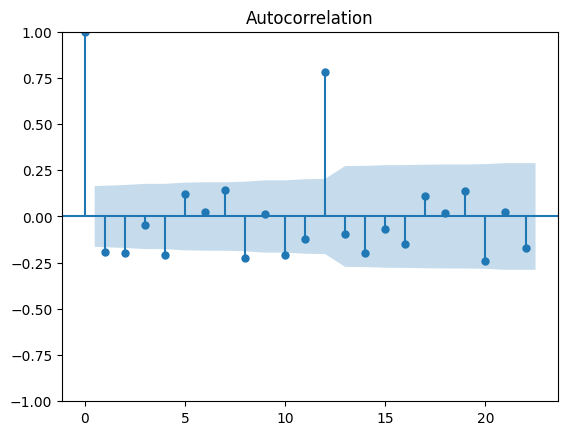

In [25]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

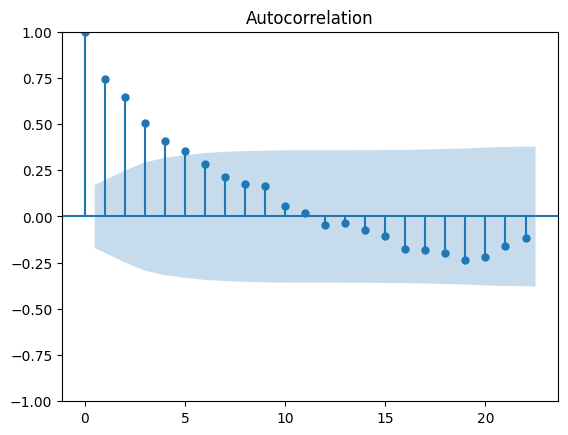

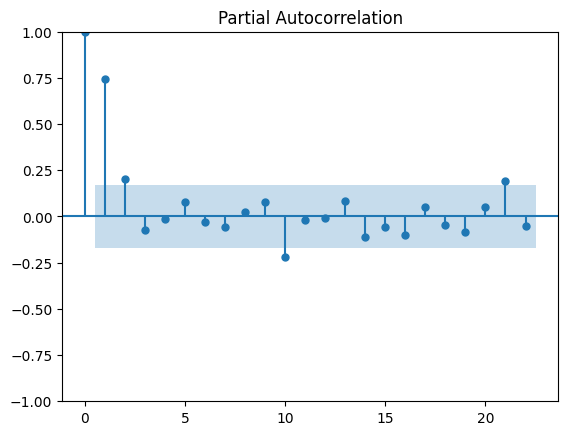

In [26]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

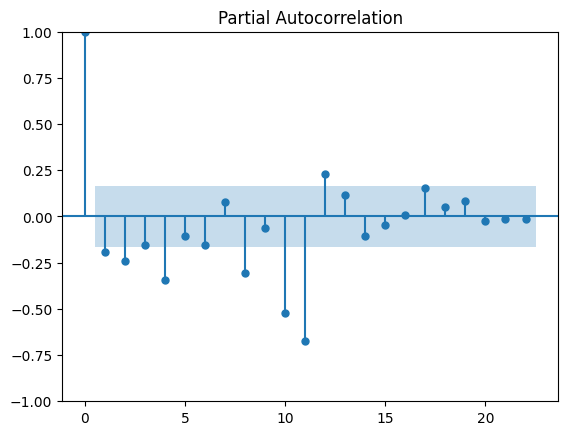

In [27]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())

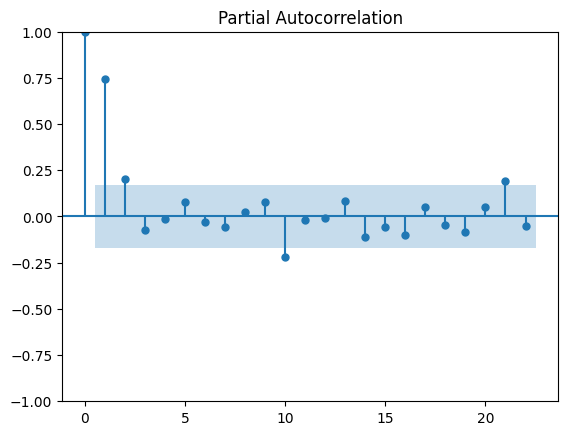

In [28]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [29]:
### split train and test data
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [30]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [31]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [32]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [33]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [36]:
## create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [37]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [49]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(10,2,13))

/Users/thomas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/thomas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/thomas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [50]:
model_Arima_fit=model_ARIMA.fit()

/Users/thomas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/thomas/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [51]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                    ARIMA(10, 2, 13)   Log Likelihood                -307.835
Date:                     Thu, 14 Nov 2024   AIC                            663.669
Time:                             16:00:08   BIC                            721.431
Sample:                         01-01-1949   HQIC                           686.860
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0808      0.083      0.975      0.329      -0.082       0.243
ar.L2         -1.0716      0.103    -10.430      0.000      -1.273      -0.870
ar.L3          0.1839      0.148      1.239      0.215      -0.107       0.475
ar.L4         -1.0655      0.162     -6.593      0.000      -1.382      -0.749
ar.L5          0.2071      0.153      1.358      0.175      -0.092       0.506
ar.L6         -1.0380      0.155     -6.699      0.000      -1.342      -0.734
ar.L7          0.1137      0.131      0.871      0.384      -0.142       0.369
ar.L8         -1.0109      0.102     -9.868      0.000      -1.212      -0.810
ar.L9          0.0342      0.085      0.402      0.688      -0.132       0.201
ar.L10        -0.9372      0.065    -14.348      0.000      -1.065      -0.809
ma.L1         -1.2531      0.710     -1.764      0.078      -2.645       0.139
ma.L2          1.2160      0.459      2.649      0.008       0.316       2.116
ma.L3         -1.6847      0.656     -2.567      0.010      -2.971      -0.399
ma.L4          1.6365      0.911      1.797      0.072      -0.149       3.422
ma.L5         -1.5803      0.863     -1.832      0.067      -3.271       0.111
ma.L6          1.7174      1.173      1.464      0.143      -0.583       4.017
ma.L7         -1.5999      1.141     -1.402      0.161      -3.836       0.637
ma.L8          1.4451      1.079      1.339      0.180      -0.669       3.560
ma.L9         -1.1193      1.083     -1.034      0.301      -3.242       1.003
ma.L10         0.8800      0.778      1.130      0.258      -0.646       2.406
ma.L11        -0.5179      0.703     -0.737      0.461      -1.896       0.860
ma.L12         0.0345      0.387      0.089      0.929      -0.723       0.792
ma.L13        -0.1592      0.315     -0.506      0.613      -0.776       0.458
sigma2        74.4138     48.869      1.523      0.128     -21.367     170.195
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):                 3.43
Prob(Q):                              0.52   Prob(JB):                         0.18
Heteroskedasticity (H):               2.43   Skew:                             0.47
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,319.0
1956-02-01,277.0,-7.0,-13.0,44.0,360.0
1956-03-01,317.0,40.0,47.0,50.0,401.0
1956-04-01,313.0,-4.0,-44.0,44.0,442.0
1956-05-01,318.0,5.0,9.0,48.0,483.0
1956-06-01,374.0,56.0,51.0,59.0,524.0
1956-07-01,413.0,39.0,-17.0,49.0,565.0
1956-08-01,405.0,-8.0,-47.0,58.0,606.0
1956-09-01,355.0,-50.0,-42.0,43.0,647.0


In [53]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [54]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [55]:
pred

1956-01-01    285.319038
1956-02-01    268.009519
1956-03-01    288.964434
1956-04-01    300.867037
1956-05-01    302.896894
1956-06-01    358.013362
1956-07-01    398.480948
1956-08-01    375.882593
1956-09-01    346.489673
1956-10-01    308.296666
1956-11-01    283.599542
1956-12-01    312.099928
1957-01-01    315.258826
1957-02-01    288.090148
1957-03-01    304.967039
1957-04-01    321.215939
1957-05-01    326.090323
1957-06-01    379.968710
1957-07-01    421.440129
1957-08-01    400.626076
1957-09-01    374.701523
1957-10-01    343.853642
1957-11-01    319.923028
1957-12-01    343.089514
1958-01-01    342.933102
1958-02-01    309.783247
1958-03-01    322.333594
1958-04-01    342.036328
1958-05-01    348.807370
1958-06-01    400.673233
1958-07-01    443.016446
1958-08-01    424.567850
1958-09-01    402.486029
1958-10-01    378.966183
1958-11-01    356.298858
1958-12-01    374.351805
1959-01-01    371.293462
1959-02-01    333.115420
1959-03-01    341.153662
1959-04-01    363.412204


In [56]:
residuals

Month
1956-01-01     -1.319038
1956-02-01      8.990481
1956-03-01     28.035566
1956-04-01     12.132963
1956-05-01     15.103106
1956-06-01     15.986638
1956-07-01     14.519052
1956-08-01     29.117407
1956-09-01      8.510327
1956-10-01     -2.296666
1956-11-01    -12.599542
1956-12-01     -6.099928
1957-01-01     -0.258826
1957-02-01     12.909852
1957-03-01     51.032961
1957-04-01     26.784061
1957-05-01     28.909677
1957-06-01     42.031290
1957-07-01     43.559871
1957-08-01     66.373924
1957-09-01     29.298477
1957-10-01      3.146358
1957-11-01    -14.923028
1957-12-01     -7.089514
1958-01-01     -2.933102
1958-02-01      8.216753
1958-03-01     39.666406
1958-04-01      5.963672
1958-05-01     14.192630
1958-06-01     34.326767
1958-07-01     47.983554
1958-08-01     80.432150
1958-09-01      1.513971
1958-10-01    -19.966183
1958-11-01    -46.298858
1958-12-01    -37.351805
1959-01-01    -11.293462
1959-02-01      8.884580
1959-03-01     64.846338
1959-04-01     32.5

<AxesSubplot: ylabel='Density'>

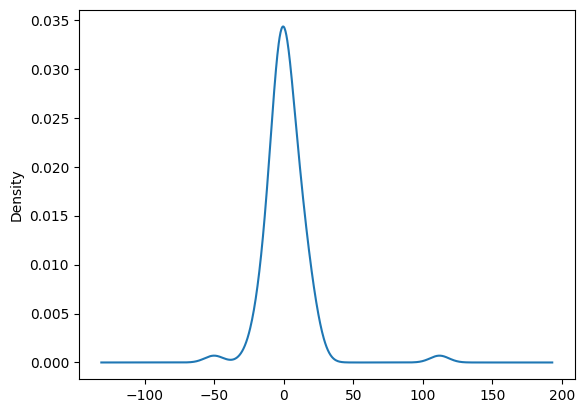

In [57]:
model_Arima_fit.resid.plot(kind='kde')

In [58]:
test_data['Predicted_ARIMA']=pred

/var/folders/d7/dj_4mq8d06360634vn1zgy8w0000gn/T/ipykernel_87393/95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot: xlabel='Month'>

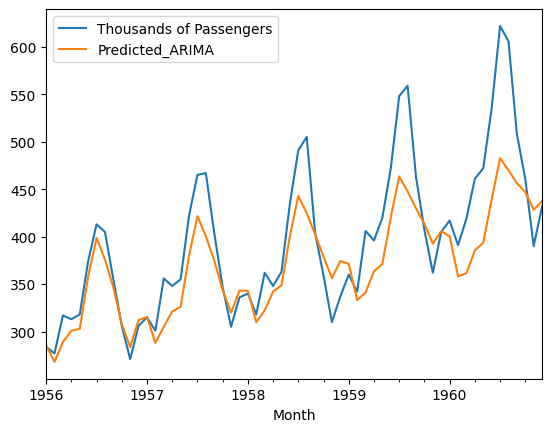

In [59]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

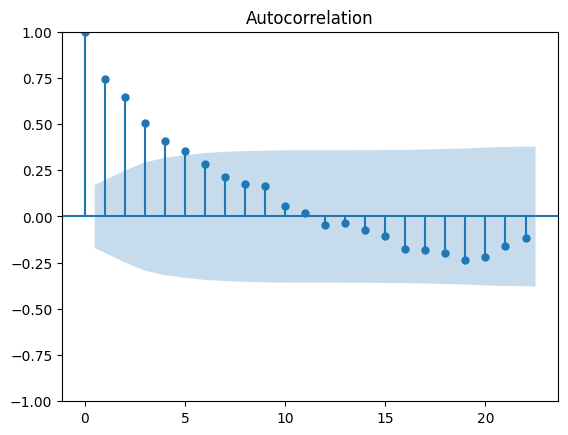

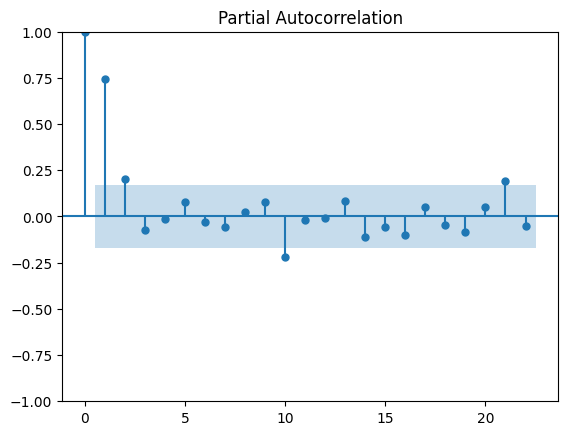

In [60]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [61]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [62]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

/Users/thomas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/thomas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [63]:
model_SARIMA_fit=model_SARIMA.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18261D+00    |proj g|=  4.32163D-02

At iterate    5    f=  3.17613D+00    |proj g|=  3.18802D-02

At iterate   10    f=  3.17248D+00    |proj g|=  2.87534D-03

At iterate   15    f=  3.16990D+00    |proj g|=  1.51306D-02

At iterate   20    f=  3.16244D+00    |proj g|=  1.29733D-02

At iterate   25    f=  3.15869D+00    |proj g|=  3.74130D-03

At iterate   30    f=  3.15804D+00    |proj g|=  2.78427D-03

At iterate   35    f=  3.15800D+00    |proj g|=  5.64393D-04

At iterate   40    f=  3.15797D+00    |proj g|=  4.69518D-03

At iterate   45    f=  3.15776D+00    |proj g|=  6.41634D-03

At iterate   50    f=  3.15761D+00    |proj g|=  1.36533D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/thomas/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [64]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.239
Date:                             Thu, 14 Nov 2024   AIC                            548.479
Time:                                     16:00:22   BIC                            568.969
Sample:                                 01-01-1949   HQIC                           556.636
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5917      0.948      0.624      0.532      -1.266       2.449
ar.L2          0.8321      0.231      3.595      0.000       0.378       1.286
ar.L3         -0.4468      0.903     -0.495      0.621      -2.216       1.322
ma.L1          0.1907      1.202      0.159      0.874      -2.166       2.547
ma.L2         -0.5295      1.298     -0.408      0.683      -3.073       2.014
ma.L3         -0.1003      0.395     -0.254      0.800      -0.875       0.675
ma.L4         -0.1286      0.354     -0.363      0.716      -0.823       0.566
ma.L5          0.2454      0.368      0.667      0.505      -0.476       0.966
sigma2        87.7530     85.600      1.025      0.305     -80.020     255.526
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.67
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.04   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
test_data.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,470.071367
1960-09-01,508.0,-98.0,-82.0,45.0,456.222257
1960-10-01,461.0,-47.0,51.0,54.0,447.031014
1960-11-01,390.0,-71.0,-24.0,28.0,428.267391
1960-12-01,432.0,42.0,113.0,27.0,437.342932


In [66]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [67]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

<AxesSubplot: xlabel='Month'>

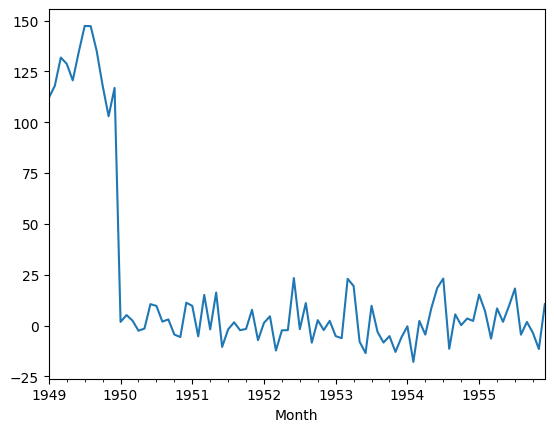

In [68]:
model_SARIMA_fit.resid.plot()

<AxesSubplot: ylabel='Density'>

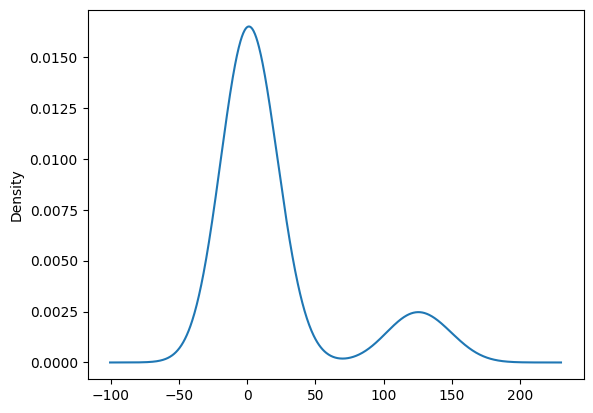

In [69]:
model_SARIMA_fit.resid.plot(kind='kde')

In [70]:
test_data['Predicted_SARIMA']=pred_Sarima

/var/folders/d7/dj_4mq8d06360634vn1zgy8w0000gn/T/ipykernel_87393/1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [71]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,285.319038,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,268.009519,NaN
1956-03-01,317.0,40.0,47.0,50.0,288.964434,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,300.867037,NaN
1956-05-01,318.0,5.0,9.0,48.0,302.896894,NaN
1956-06-01,374.0,56.0,51.0,59.0,358.013362,NaN
1956-07-01,413.0,39.0,-17.0,49.0,398.480948,403.482095
1956-08-01,405.0,-8.0,-47.0,58.0,375.882593,385.167504
1956-09-01,355.0,-50.0,-42.0,43.0,346.489673,349.554502


<AxesSubplot: xlabel='Month'>

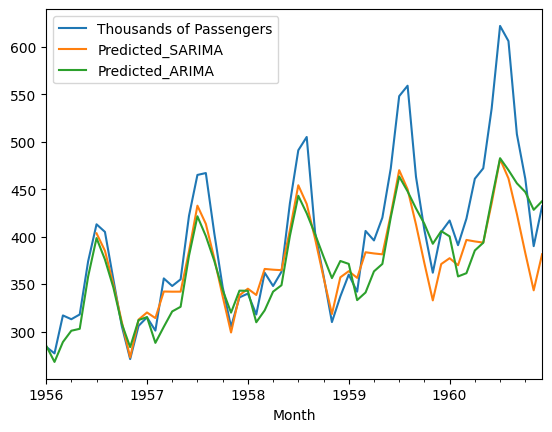

In [72]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()